# 트리 위의 게임

- 시간 제한: 1 초

정점 $N$개의 트리에서 두 사람이 게임을 진행하려 한다.

각 정점은 1번부터 $N$번까지 번호가 매겨져 있고 루트노드는 1번 노드이다.

게임은 서로 턴을 번갈아 가며 진행되고 트리 위에 놓을 수 있는 말과 함께 진행된다.

두 사람의 점수는 모두 0점으로 시작한다.

각 턴마다 두 사람은 다음과 같은 작업을 반복한다.

- 현재 말이 놓여 있는 정점의 번호만큼 자신의 점수에 더한다.
- 현재 말이 놓여 있는 정점의 자식 정점이 없다면 그대로 게임을 종료한다. 자식 정점이 존재한다면 자식 정점 중 원하는 자식 정점으로 말을 옮긴다.

게임이 종료되었을 때 선공의 점수가 후공의 점수보다 높거나 같다면 선공이 승리하고 아니라면 후공이 승리한다.

두 사람이 최적으로 플레이할 때, 처음 말이 놓여져 있는 정점의 번호에 따라 선공이 이기는지 후공이 이기는지 구해보자.

---

## 입력

- 첫째 줄에 정점의 수 $N$이 주어진다.
    
    $$
    1≤N≤100000
    $$
    
- 둘째 줄부터 $N$−1개의 줄에 간선을 나타내는 정수 $u$, $v$가 주어진다.
    
    $$
    1≤u,\space v≤N
    $$
    
- 이는 $u$번 정점과 $v$번 정점을 잇는 간선이 존재한다는 뜻이다.

---

## 출력

- $N$개의 줄에 걸쳐 정답을 출력한다.
- $i$번째 줄에는 말의 시작위치가 $i$번 정점일 때의 결과를 출력한다.
- 선공이 이긴다면 1을 후공이 이긴다면 0을 출력한다.

---

## 입력 예시 1

```
5
1 3
2 1
3 4
5 1
```

## 출력 예시 1

```
1
1
0
1
1
```

---

## 입력 예시 2

```
6
1 3
1 2
3 5
3 6
2 4
```

## 출력 예시 2

```
1
0
0
1
1
1
```

# 1번째 시도 : 오답 + 시간 초과
- **idea** : 선공이 이기는 경로가 하나라도 존재하면 선공이 승리, 아니면 후공이 승리한다고 생각함.
- **트리 생성** : 1에서 출발한 각 경로를 리스트에 담아, 가능한 모든 경로를 리스트에 저장.
- **점수 계산** : 각 경로마다 점수를 계산해, 선공의 점수가 후공의 점수보다 크거나 같으면 1을 출력

In [29]:
# 1번째 시도 코드
def make_tree(u, v, tree):
    if u not in nodes:  # u: 연결하는 노드, v: 새로 추가하는 노드
        u, v = v, u
    nodes.add(v)

    for rt in tree:
        if u in rt:
            if rt.index(u) == (len(rt)-1):
                rt.append(v)
            else:
                new_rt = rt[:rt.index(u)+1] + [v]
                if new_rt not in tree:
                    tree.append(new_rt)
    return tree

N = int(input())
gametree = []
for i in range(N-1):
    gametree.append(list(map(int, input().split())))

nodes = set([1])
tree = [[1]]
later = []

# 트리 생성
while gametree != []:
    print(gametree)
    u, v = gametree[0][0], gametree[0][1]
    if u not in nodes and v not in nodes:
        print('not in!', u, v)
        gametree.pop(0)
        gametree.append([u,v])
        continue
    else:
        print('in')
        tree = make_tree(u, v, tree)
        gametree.pop(0)
print(tree)

# 결과 출력
first, second = 0, 0

for start in range(1, N+1):
    firstWin = 0
    scoreStart = 0

    for rt in tree:
        if start in rt:
            scoreStart = rt.index(start)
            first = sum(rt[scoreStart::2])
            second = sum(rt[scoreStart+1::2])
            if first >= second:
                firstWin = 1
                continue
    print()
    print(firstWin)

11
1 2
5 6
4 9
11 4
8 3
1 8
7 8
10 1
6 8
3 4
[[1, 2], [5, 6], [4, 9], [11, 4], [8, 3], [1, 8], [7, 8], [10, 1], [6, 8], [3, 4]]
in
[[5, 6], [4, 9], [11, 4], [8, 3], [1, 8], [7, 8], [10, 1], [6, 8], [3, 4]]
not in! 5 6
[[4, 9], [11, 4], [8, 3], [1, 8], [7, 8], [10, 1], [6, 8], [3, 4], [5, 6]]
not in! 4 9
[[11, 4], [8, 3], [1, 8], [7, 8], [10, 1], [6, 8], [3, 4], [5, 6], [4, 9]]
not in! 11 4
[[8, 3], [1, 8], [7, 8], [10, 1], [6, 8], [3, 4], [5, 6], [4, 9], [11, 4]]
not in! 8 3
[[1, 8], [7, 8], [10, 1], [6, 8], [3, 4], [5, 6], [4, 9], [11, 4], [8, 3]]
in
[[7, 8], [10, 1], [6, 8], [3, 4], [5, 6], [4, 9], [11, 4], [8, 3]]
in
[[10, 1], [6, 8], [3, 4], [5, 6], [4, 9], [11, 4], [8, 3]]
in
[[6, 8], [3, 4], [5, 6], [4, 9], [11, 4], [8, 3]]
in
[[3, 4], [5, 6], [4, 9], [11, 4], [8, 3]]
not in! 3 4
[[5, 6], [4, 9], [11, 4], [8, 3], [3, 4]]
in
[[4, 9], [11, 4], [8, 3], [3, 4]]
not in! 4 9
[[11, 4], [8, 3], [3, 4], [4, 9]]
not in! 11 4
[[8, 3], [3, 4], [4, 9], [11, 4]]
in
[[3, 4], [4, 9], [11, 4]]
in

[생성부]
- nodes = {1}
- 입력받은 후 nodes에 있는지 확인
- u = 연결 노드(기존 노드), v = 새로운 노드
- rt에서 기존 노드를 찾았는데 마지막 노드라면 -> v를 추가
- rt에서 기존 노드를 찾았는데, 중간 노드라면 -> 중간노드 뒤에 v를 추가한 리스트를 통째로 추가


[출력부]
- 모든 rt에서 찾기

---
**오답 이유**
- 선공이 이기는 루트가 존재하더라도, 후공의 선택에 따라 선공이 질 수 있다.
- 순서에 따라 결과가 달라질 수 있다는 점을 고려해서 알고리즘 짜기.

# 2번째 시도 : 시간 초과
- **idea** : 이전 방식에서는 분기점을 파악할 수 없음. 분기점을 파악하기 쉽게 `부모-자식` 쌍을 갖는 딕셔너리 형태로 입력을 받자!
- **트리 생성** : 
    - 딕셔너리로 구성, 트리 생성할 때부터 `부모:자식` 순서를 맞춰서 저장.
    - 두 개의 노드 중, 트리에 추가되어 있는 노드를 부모 노드로, 새로운 노드를 자식으로 저장.
    - 두 노드 모두 트리에 저장되어 있지 않다면 나중에 다시 확인 후 저장.
- **점수 계산** : 후위 순회로 돌며 자식 노드부터 점수를 계산해 올라옴.

In [ ]:
# 1. 입력
N = int(input())
input_tree = []
for _ in range(N-1):
    input_tree.append(list(map(int, input().split())))

# 2. 트리 딕셔너리 생성
nodes = set([1])
tree = {i:[] for i in range(1, N+1)}

while input_tree:
    u, v = input_tree[0][0], input_tree[0][1]
    
    # u와 v가 모두 트리에 없는 경우, 나중에 다시 확인
    if u not in nodes and v not in nodes:
        input_tree.pop(0)
        input_tree.append([u,v])
        continue

    # u, v 중 하나는 트리에 존재함
    # u: 트리에 있는 node, v: 새로 추가되는 노드
    if u in nodes:
        tree[u].append(v)
        nodes.add(v)
    # v: 트리에 있는 node, u: 새로 추가되는 노드
    else:
        tree[v].append(u)
        nodes.add(u)
    
    input_tree.pop(0)
        
        
# 3. 점수 계산: 후위 순회로 자식 노드부터 점수 계산
def calculate_score(tree, node, depth, score):
    if node in tree:
        for child in tree[node]:
            calculate_score(tree, child, depth+1, score)
    
    # 공격자 표시
    # 선공: 1, 후공: 0
    turn = depth % 2
    
    # 자식 노드가 없는 경우
    if len(tree[node]) == 0:
        score[node][turn] = node  # node 숫자가 점수가 됨
    
    # 자식 노드가 1개인 경우
    elif len(tree[node]) == 1:
        child = tree[node][0]
        score[node][turn] = score[child][turn] + node
        score[node][not turn] = score[child][not turn]  # 자식 node의 점수가 상대의 점수가 됨
    
    # 자식 노드가 2개 이상인 경우
    else:
        # 최적의 자식 노드 찾기
        opt_child = tree[node][0]
        opt_score = score[opt_child][turn] - score[opt_child][not turn]

        for child in tree[node]:
            if (score[child][turn] - score[child][not turn]) > opt_score:
                opt_child = child
                opt_score = score[opt_child][turn] - score[opt_child][not turn]
                
        # 자식 노드 점수에 현재 노드 점수 더하기
        score[node][turn] = score[opt_child][turn] + node
        score[node][not turn] = score[opt_child][not turn]
            
    return score
    
for i in range(1, N+1):
    score = {i: [0,0] for i in range(1, N+1)}
    i_score = calculate_score(tree, i, 1, score)[i]
    if i_score[1] >= i_score[0]:
        print(1)
    else:
        print(0)

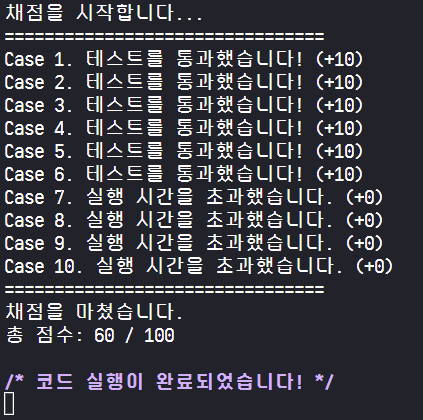

- 트리 딕셔너리를 만드는 알고리즘을 이렇게 구성하면, ~~while문의 시간 복잡도가 너무 커서 실행 시간이 초과되는 것으로 보인다.~~
- 입력(`input_tree`)을 리스트가 아니라 딕셔너리로 구성해, BFS 방식으로 구현해야 할 것 같다.

---
[추가]

- 시간 초과는 점수 계산부의 문제였던 것으로 확인되어 트리 생성부는 위의 코드도 가능한 것 같다. (제출 시 성공함) 
- 하지만 수정한 코드가 반복도 덜 하고 효율적인 것 같아 더 좋은 코드로 보인다.

# 3번째 시도 : 성공!
- **idea** : 
    - while문에서 불가능하면 넘기고 나중에 다시 확인하는 코드는 시간 복잡도를 높이기 때문에, 반복을 줄이는 코드를 사용하는 것이 바람직할 것이다. 
    - 성공한 다른 코드를 참고해, 점수 계산부에서 어디가 문제인지를 확인하자.
    
- **트리 생성** : 
    - 입력을 받을 때는 부모, 자식을 구분하지 않고 2쌍으로 저장한 후, 이후 노드 1부터 순서대로 간선을 체크하며 `부모-자식` 순서를 구분.
    
- **점수 계산** : 
    - scores의 모든 노드의 점수를 미리 [0,0]으로 초기화해두고 함수에 넣지 않고, 함수 안에서 각 노드의 점수를 계산할 때마다 `노드:점수` 쌍을 추가.

In [ ]:
# 1. 입력
N = int(input())
inputs = {i:[] for i in range(1, N+1)}
for _ in range(N-1):
    u, v = map(int, input().split())
    inputs[u].append(v)
    inputs[v].append(u)

# 2. 트리 딕셔너리 생성
next_list = [1]
tree = {i:[] for i in range(1, N+1)}

while next_list:
    parent = next_list.pop(0)
    
    # 자식노드를 찾아 tree에 추가
    for child in inputs[parent]:
        tree[parent].append(child)
        inputs[child].remove(parent)
        next_list.append(child)    
        
# 3. 점수 계산: 후위 순회로 자식 노드부터 점수 계산
def calculate_score(tree, node, depth, scores):
    if node in tree:
        for child in tree[node]:
            calculate_score(tree, child, depth+1, scores)
    
    # 공격자 표시
    # 선공: 1, 후공: 0
    turn = depth % 2
    opponent = 1 - turn
    scores[node] = [0,0]
    
    # 자식 노드가 없는 경우
    if len(tree[node]) == 0:
        scores[node][turn] = node  # node 숫자가 점수가 됨
    
    # 자식 노드가 1개인 경우
    elif len(tree[node]) == 1:
        child = tree[node][0]
        scores[node][turn] = scores[child][turn] + node   # 자식 node의 점수에 해당 노드 점수를 더함
        scores[node][opponent] = scores[child][opponent]  # 상대의 점수는 자식 node에서의 상대의 점수와 같음
    
    # 자식 노드가 2개 이상인 경우
    elif len(tree[node]) >= 2:
        # 최적의 자식 노드 찾기
        opt_child = tree[node][0]
        opt_score = scores[opt_child][turn] - scores[opt_child][opponent]

        for child in tree[node][1:]:
            child_score = scores[child][turn] - scores[child][opponent]
            if child_score > opt_score:
                opt_child = child
                opt_score = child_score
                
        # 최적의 자식 노드 점수에 현재 노드 점수 더하기
        scores[node][turn] = scores[opt_child][turn] + node
        scores[node][opponent] = scores[opt_child][opponent]
        
    return scores

# 시작 위치에 따른 결과 출력
for i in range(1, N+1):
    score = calculate_score(tree, i, 1, {})    
    if score[i][1] >= score[i][0]:
        print(1)
    else:
        print(0)